### **Taller 1 - Histogramas**

#### **Integrantes**

- Oscar Leonardo Riveros Perez

- Yovany Esneider Vargas Gutierrez

**a. Implementacion del filtro de Prewitt de 8 direcciones**

In [2]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable 


## pip install prettytable 
Mano_light  =   cv2.imread('Images/Img_Light_1.png',1)
Mano_shadow =   cv2.imread('Images/Img_Outdoor_1.png',1)
Mano        =   cv2.imread('Images/Img_Indoor_1.png',1)

Mano_light_Gray  =   cv2.imread('Images/Img_Light_1.png',0)
Mano_shadow_Gray =   cv2.imread('Images/Img_Outdoor_1.png',0)
Mano_Gray        =   cv2.imread('Images/Img_Indoor_1.png',0)



In [3]:
def Prewitt_Filter(Img_In):
    Kernel_N=np.array([[-1,-1,-1],[1,-2,1],[1,1,1]])
    Kernel_S=np.array([[1,1,1],[1,-2,1],[-1,-1,-1]])
    Kernel_E=np.array([[1,1,-1],[1,-2,-1],[1,1,-1]])
    Kernel_O=np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])

    Kernel_SO=np.array([[1,1,1],[-1,-2,1],[-1,-1,1]])   
    Kernel_NO=np.array([[-1,-1,1],[-1,-2,1],[1,1,1]])   
    Kernel_SE=np.array([[1,1,1],[1,-2,-1],[1,-1,-1]])   
    Kernel_NE=np.array([[1,-1,-1],[1,-2,-1],[1,1,1]])   

    Prewitt_N=cv2.filter2D(Img_In,-1,Kernel_N)
    Prewitt_S=cv2.filter2D(Img_In,-1,Kernel_S)
    Prewitt_E=cv2.filter2D(Img_In,-1,Kernel_E)
    Prewitt_O=cv2.filter2D(Img_In,-1,Kernel_O)

    Prewitt_SO=cv2.filter2D(Img_In,-1,Kernel_SO)
    Prewitt_NO=cv2.filter2D(Img_In,-1,Kernel_NO)
    Prewitt_SE=cv2.filter2D(Img_In,-1,Kernel_SE)
    Prewitt_NE=cv2.filter2D(Img_In,-1,Kernel_NE)

    return (Prewitt_N+Prewitt_S+Prewitt_E+Prewitt_O+Prewitt_SO+Prewitt_NO+Prewitt_SE+Prewitt_NE)

Prewitt_Light   =   Prewitt_Filter(Mano_light)
Prewitt_Shadow  =   Prewitt_Filter(Mano_shadow)
Prewitt         =   Prewitt_Filter(Mano)

Prewitt_Light_Gray   =   Prewitt_Filter(Mano_light_Gray)
Prewitt_Shadow_Gray  =   Prewitt_Filter(Mano_shadow_Gray)
Prewitt_Gray         =   Prewitt_Filter(Mano_Gray)

# Muestra el filtro aplicado a imagenes en RGB
cv2.imshow('Prewitt_Light',Prewitt_Light)
cv2.imshow('Prewitt_Shadow',Prewitt_Shadow)
cv2.imshow('Prewitt',Prewitt)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Muestra el filtro aplicado a imagenes en escala de grises
cv2.imshow('Prewitt_Light_Gray',Prewitt_Light_Gray)
cv2.imshow('Prewitt_Shadow_Gray',Prewitt_Shadow_Gray)
cv2.imshow('Prewitt_Gray',Prewitt_Gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

**b. Funciones vistas en el taller**

***1. Redimensionamiento***

In [4]:
H,W = Mano.shape[:2]
H_1=int(H/7)
W_1=int(W/3)

Mano_Nearest    =   cv2.resize(Mano,(W_1,H_1),cv2.INTER_NEAREST)
Mano_Bilineal   =   cv2.resize(Mano,(W_1,H_1),cv2.INTER_LINEAR)
Mano_Pixel_Area =   cv2.resize(Mano,(W_1,H_1),cv2.INTER_AREA)
Mano_Bicubica   =   cv2.resize(Mano,(W_1,H_1),cv2.INTER_CUBIC)

# Neares < Lineal < Area < Bicubic

cv2.imshow('Mano_Nearest',Mano_Nearest)
cv2.imshow('Mano_Bilineal',Mano_Bilineal)
cv2.imshow('Mano_Pixel_Area',Mano_Pixel_Area)
cv2.imshow('Mano_Bicubica',Mano_Bicubica)

cv2.waitKey(0)
cv2.destroyAllWindows()


***2. Espacios de Color***

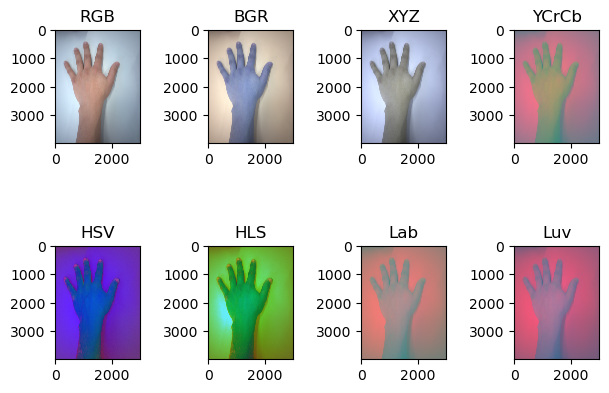

In [8]:
#[:,:,::-1] -> Correccion para representar con matplotlib, ya que el arreglo de opencv esta en [B,G,R] y matplotlib [R,G,B]

Mano_BGR        =   cv2.cvtColor(Mano[:,:,::-1], cv2.COLOR_RGB2BGR)
Mano_XYZ        =   cv2.cvtColor(Mano[:,:,::-1], cv2.COLOR_RGB2XYZ)
Mano_YCrCb      =   cv2.cvtColor(Mano[:,:,::-1], cv2.COLOR_RGB2YCrCb)
Mano_HSV        =   cv2.cvtColor(Mano[:,:,::-1], cv2.COLOR_RGB2HSV)
Mano_HLS        =   cv2.cvtColor(Mano[:,:,::-1], cv2.COLOR_RGB2HLS)
Mano_LAB        =   cv2.cvtColor(Mano[:,:,::-1], cv2.COLOR_RGB2Lab)
Mano_LUV        =   cv2.cvtColor(Mano[:,:,::-1], cv2.COLOR_RGB2Luv)

plt.figure(1)
plt.subplot(241), plt.imshow(Mano[:,:,::-1]), plt.title('RGB')
plt.subplot(242), plt.imshow(Mano_BGR), plt.title('BGR')
plt.subplot(243), plt.imshow(Mano_XYZ), plt.title('XYZ')
plt.subplot(244), plt.imshow(Mano_YCrCb), plt.title('YCrCb')
plt.subplot(245), plt.imshow(Mano_HSV), plt.title('HSV')
plt.subplot(246), plt.imshow(Mano_HLS), plt.title('HLS')
plt.subplot(247), plt.imshow(Mano_LAB), plt.title('Lab')
plt.subplot(248), plt.imshow(Mano_LUV), plt.title('Luv')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***3a. Umbralizacion Estatica***

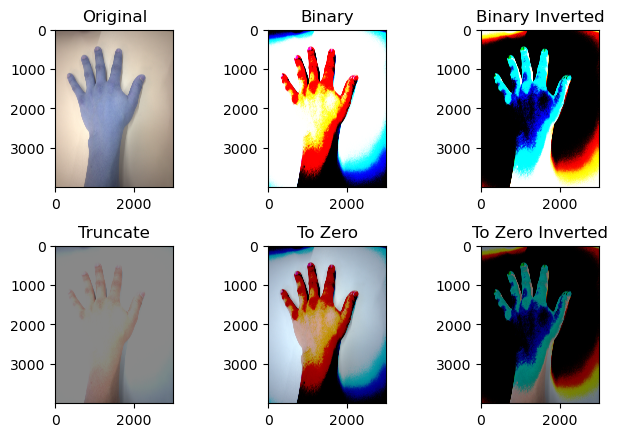

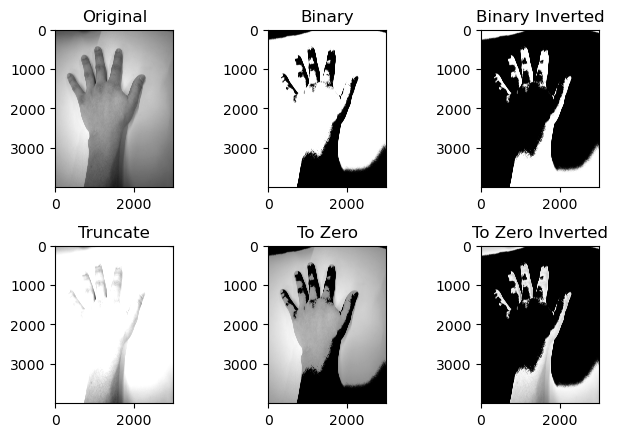

In [9]:
#[:,:,::-1] -> Correccion para representar con matplotlib, ya que el arreglo de opencv esta en [B,G,R] y matplotlib [R,G,B]

Umbral=136
Max_Valor=255

Mano_Binary         =   cv2.threshold(Mano[:,:,::-1],Umbral,Max_Valor,cv2.THRESH_BINARY)
Mano_Binary_Inv     =   cv2.threshold(Mano[:,:,::-1],Umbral,Max_Valor,cv2.THRESH_BINARY_INV)
Mano_Truncate       =   cv2.threshold(Mano[:,:,::-1],Umbral,Max_Valor,cv2.THRESH_TRUNC)
Mano_To_Zero        =   cv2.threshold(Mano[:,:,::-1],Umbral,Max_Valor,cv2.THRESH_TOZERO)
Mano_To_Zero_Inv    =   cv2.threshold(Mano[:,:,::-1],Umbral,Max_Valor,cv2.THRESH_TOZERO_INV)

Mano_Binary_Gray        =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_BINARY)
Mano_Binary_Inv_Gray    =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_BINARY_INV)
Mano_Truncate_Gray      =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_TRUNC)
Mano_To_Zero_Gray       =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_TOZERO)
Mano_To_Zero_Inv_Gray   =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_TOZERO_INV)

# Threshold aplicado a imagenes en RGB
plt.figure(1)
plt.subplot(231), plt.imshow(Mano[:,:,::-1], cmap=plt.cm.gray), plt.title('Original')
plt.subplot(232), plt.imshow(Mano_Binary[1]), plt.title('Binary')
plt.subplot(233), plt.imshow(Mano_Binary_Inv[1]), plt.title('Binary Inverted')
plt.subplot(234), plt.imshow(Mano_Truncate[1]), plt.title('Truncate')
plt.subplot(235), plt.imshow(Mano_To_Zero[1]), plt.title('To Zero')
plt.subplot(236), plt.imshow(Mano_To_Zero_Inv[1]), plt.title('To Zero Inverted')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

# Threshold aplicado a imagenes en escala de grises
plt.figure(1)
plt.subplot(231), plt.imshow(Mano_Gray, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(232), plt.imshow(Mano_Binary_Gray[1], cmap=plt.cm.gray), plt.title('Binary')
plt.subplot(233), plt.imshow(Mano_Binary_Inv_Gray[1], cmap=plt.cm.gray), plt.title('Binary Inverted')
plt.subplot(234), plt.imshow(Mano_Truncate_Gray[1], cmap=plt.cm.gray), plt.title('Truncate')
plt.subplot(235), plt.imshow(Mano_To_Zero_Gray[1], cmap=plt.cm.gray), plt.title('To Zero')
plt.subplot(236), plt.imshow(Mano_To_Zero_Inv_Gray[1], cmap=plt.cm.gray), plt.title('To Zero Inverted')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

***3b. Umbralizacion Adaptativa***